In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib widget

from jfunctions import *

# Get directory locations from param file
base_dir, run_dir, save_dir, version = read_params("./params.dat")

print(base_dir)

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/waves
/store/ATMOS/cwp29/data/waves/wide/hres/N_05/


In [2]:
#Load simulation data
var1, var2, times = load_data('th1_xz', 'nu_t_xz')
NSAMP = len(times)

times, t0_idx = calibrate_time(save_dir, times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'nlwf_xz', 'nlwf_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz', 'th2_xy', 'th2_xz', 'th2_yz', 'tked_xy', 'tked_xz', 'tked_yz', 'u_xy', 'u_xz', 'u_yz', 'v_xy', 'v_xz', 'v_yz', 'w_xy', 'w_xz', 'w_yz']>
Plume penetration occured at t=2.1691


In [3]:
# Time control
buoy_per = round(2*np.pi/np.sqrt(md['N2']),1)
md['TIME_LIMIT'] = (md['FINE_RES_TIME'] + md['NBUOY_PERIODS'])*buoy_per
md['SAVE_STATS_DT'] *= buoy_per
md['SAVE_STATS_DT_FINE'] *= buoy_per

In [4]:
print(md)

{'LX': 1.0, 'LY': 1.0, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 3.15, 'NU_START': 1e-07, 'SAVE_FLOW_DT': 500.0, 'VERSION': 3.12, 'NU_START_TIME': 50.0, 'SAVE_STATS_DT_FINE': 0.252, 'FINE_RES_TIME': 2.0, 'TIME_LIMIT': 101.05199999999999, 'NBUOY_PERIODS': 6.02, 'r0': 0.005, 'alpha_e': 0.1, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.1, 'N2': 0.25, 'H': 0.2, 'b_factor': 0.4, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'Nx': 1024, 'Ny': 1024, 'Nz': 513, 'Nth': 2}


In [5]:
#Create grid
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 98
Dimensional times:  [-2.16911127  0.          3.1425      6.285       9.4275     12.57
 15.7125     18.855      21.9975     25.14       25.3914     25.6428
 25.8942     26.1456     26.397      26.6484     26.8998     27.1512
 27.4026     27.654      27.9054     28.1568     28.4082     28.6596
 28.911      29.1624     29.4138     29.6652     29.9166     30.168
 30.4194     30.6708     30.9222     31.1736     31.425      31.6764
 31.9278     32.1792     32.4306     32.682      32.9334     33.1848
 33.4362     33.6876     33.939      34.1904     34.4418     34.6932
 34.9446     35.196      35.4474     35.6988     35.9502     36.2016
 36.453      36.7044     36.9558     37.2072     37.4586     37.71
 37.9614     38.2128     38.4642     38.7156     38.967      39.2184
 39.4698     39.7212     39.9726     40.224      40.4754     40.7268
 40.9782     41.2296     41.481      41.7324     41.9838     42.2352
 42.4866     42.738      42.9894     43.2408     43.4922     43.743

Setting up initial plot...
Starting plot...


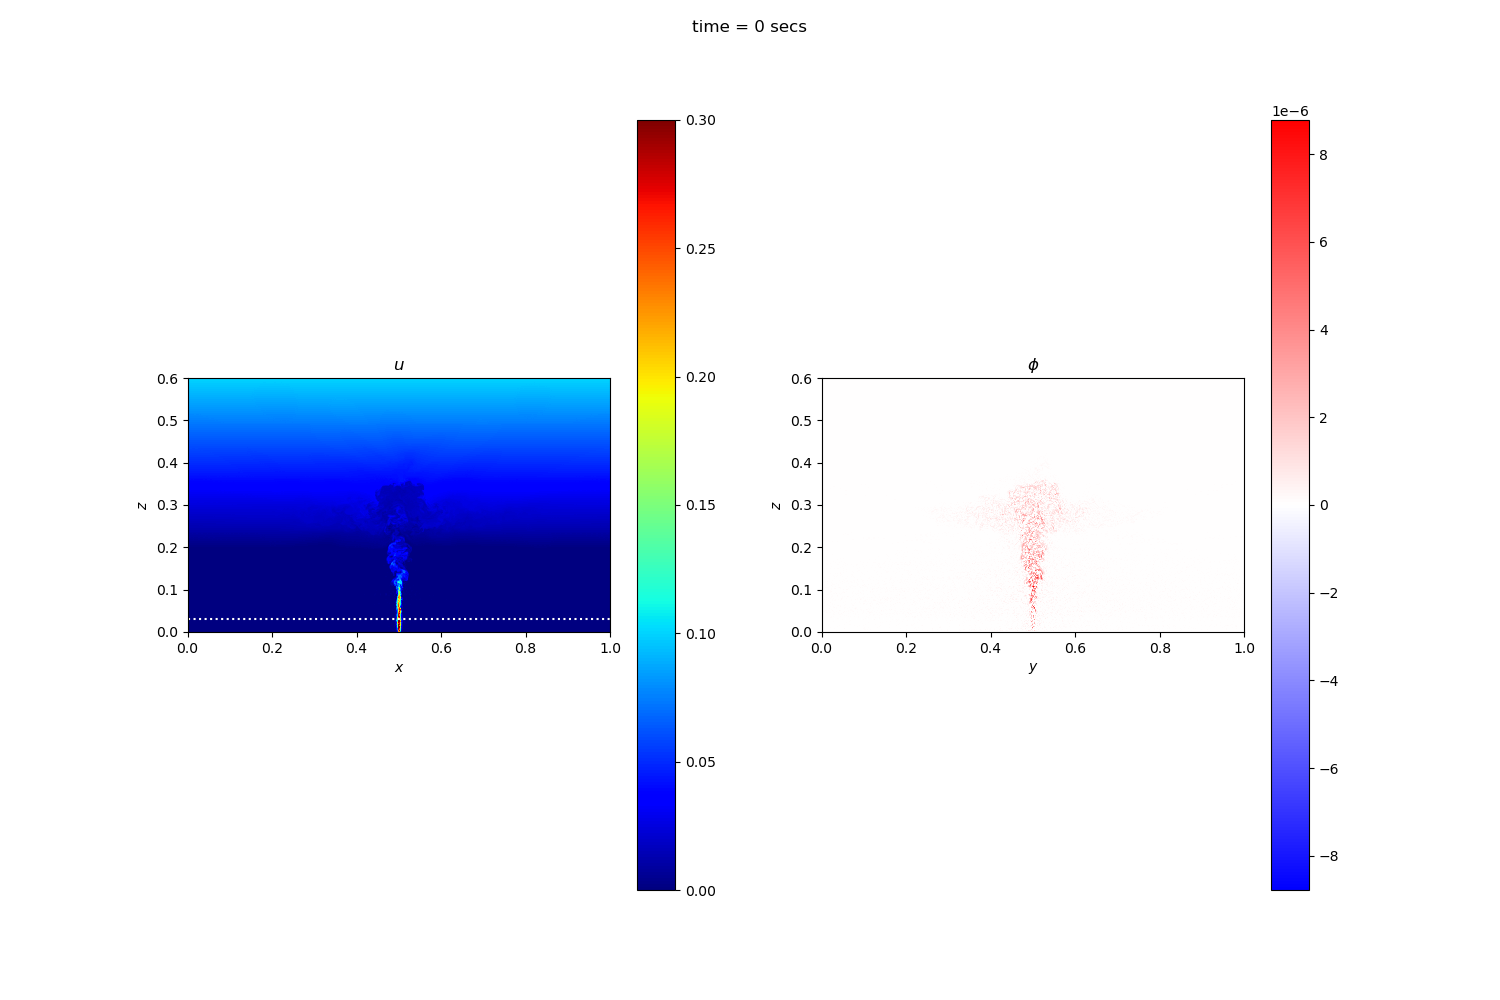

In [6]:
# print("Setting up data arrays...")
fig, axs = plt.subplots(1,2,figsize=(15, 10))
ims = np.array([None,None])
cb = np.array([None,None])

print("Setting up initial plot...")
ims[0] = axs[0].pcolormesh(X, Y, var1[-1], cmap='jet')
ims[1] = axs[1].pcolormesh(X, Y, var2[-1], cmap='bwr', norm=colors.CenteredNorm())

# Add forcing level
axs[0].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[1].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')

cb[0] = plt.colorbar(ims[0],ax=axs[0])
cb[1] = plt.colorbar(ims[1],ax=axs[1])

ims[0].set_clim(0, 3e-1)
#ims[1].set_clim(0, 1e-3)
#ims[1].set_clim(, 1e-3)

fig.suptitle("time = 0 secs")
axs[0].set_ylabel("$z$")
axs[1].set_ylabel("$z$")
axs[0].set_xlabel("$x$")
axs[1].set_xlabel("$y$")

#axs[0].set_ylim(md['H'], 2*md['H'])
#axs[1].set_ylim(md['H'], 2*md['H'])

#axs[0].set_xlim(0.4, 0.6)
#axs[1].set_xlim(0.4, 0.6)

axs[0].set_aspect(1)
axs[1].set_aspect(1)

axs[0].set_title(r"$u$")
axs[1].set_title(r"$\phi$")

def animate(step):
    ims[0].set_array(var1[step].ravel())
    ims[1].set_array(var2[step].ravel())
    fig.suptitle("time = {0:.2f} secs".format(times[step]))

    return ims.flatten(),

#print("Initialising mp4 writer...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, bitrate=1800)

print("Starting plot...")
anim = animation.FuncAnimation(fig, animate, interval=1000*md['SAVE_STATS_DT_FINE'], frames=NSAMP, repeat=True)
now = datetime.now()
#anim.save(save_dir+'shear_%s.mp4'%now.strftime("%d-%m-%Y"),writer=writer)

plt.show()
#save_fig(anim, '/home/cwp29/tmp/nlwf.mp4', anim=True, dpi=300)